In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import ast
from collections import Counter
from functools import reduce
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
##### Import the dataset #####

df = pd.read_csv('/content/autoscout24-germany-dataset.csv')

df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [3]:
##### Show the number of records and features of the dataset #####

print(f'The number of records in this dataset is  = {df.shape[0]}\n')
print(f'The number of features in this dataset is = {df.shape[1]}')

The number of records in this dataset is  = 46405

The number of features in this dataset is = 9


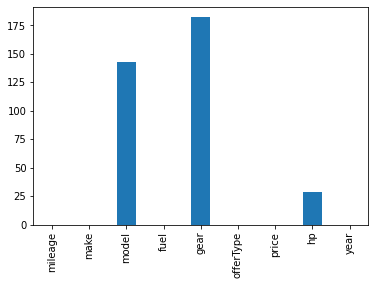

In [4]:
##### PLot how many NaN value presence in the dataset #####
df.isnull().sum().plot(kind = 'bar')

In [5]:
##### Check there is null value or not #####

if df.isnull().sum().sum() == 0:

  print('There is null value presence in the dataset.')

else:

  print('There is null value presence in the dataset.')

There is null value presence in the dataset.


In [6]:
##### Check which column has the null value #####
NaN_column_ = []

for column_ in df.columns:
  
  if df.loc[:, column_].isnull().sum().sum() > 0:

    NaN_column_.append(column_)
  
  else:

    pass

print(f'The NaN column in this dataset is = {NaN_column_}')

The NaN column in this dataset is = ['model', 'gear', 'hp']


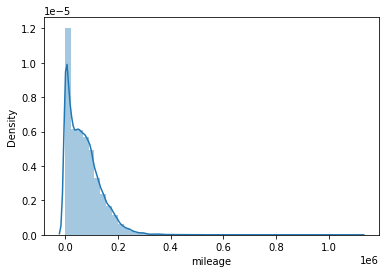

In [7]:
##### Plot the distribution of mileage feature #####

sns.distplot(df.loc[:, 'mileage'], kde = True)

plt.show()

Volkswagen    6931
Opel          4814
Ford          4442
Skoda         2889
Renault       2830
              ... 
DAF              1
Isuzu            1
Trucks-Lkw       1
Tazzari          1
Zhidou           1
Name: make, Length: 77, dtype: int64
************************************************************************************************************************
The relationship between make and mileage.



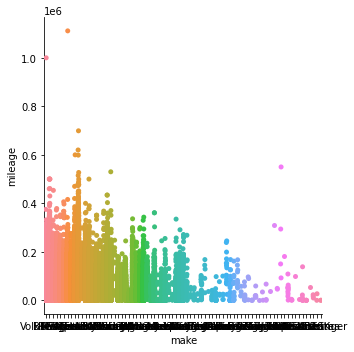

In [8]:
##### Show the value counts of the make column #####

print(df.loc[:, 'make'].value_counts())
print('*'*120)

print('The relationship between make and mileage.\n')
sns.catplot(x = 'make', y = 'mileage', data = df)
plt.show()

make
Volkswagen          560040806
Opel                376798263
Ford                307380531
BMW                 234367125
Mercedes-Benz       226153370
                      ...    
FISKER                   7500
Zhidou                   3000
Aixam                    1210
Estrima                   450
Trailer-Anhänger          103
Name: mileage, Length: 77, dtype: int64
************************************************************************************************************************
Plot the top 10 cars from the group.



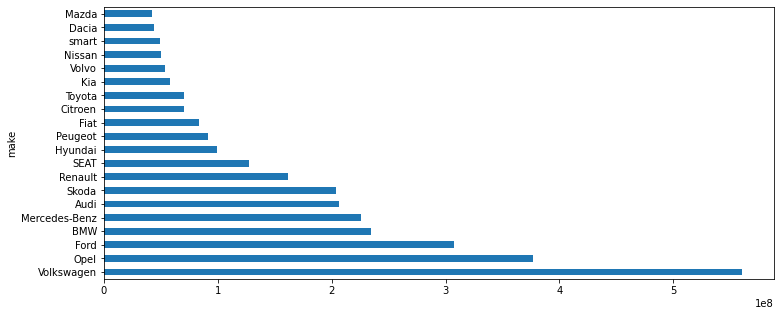

In [9]:
##### Find out, which car was given the most mileage #####
print(df.groupby(['make'])['mileage'].sum().sort_values(ascending = False))
print('*'*120)

print('Plot the top 10 cars from the group.\n')
plt.figure(figsize = (12, 5))
df.groupby(['make'])['mileage'].sum().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.show()

make
Opel                1111111
BMW                  999999
Mercedes-Benz        699000
Ford                 599900
Iveco                550000
                     ...   
Polestar               4000
Zhidou                 3000
Aixam                  1200
Estrima                 250
Trailer-Anhänger        100
Name: mileage, Length: 77, dtype: int64
************************************************************************************************************************
Plot the top 10 cars from the group.



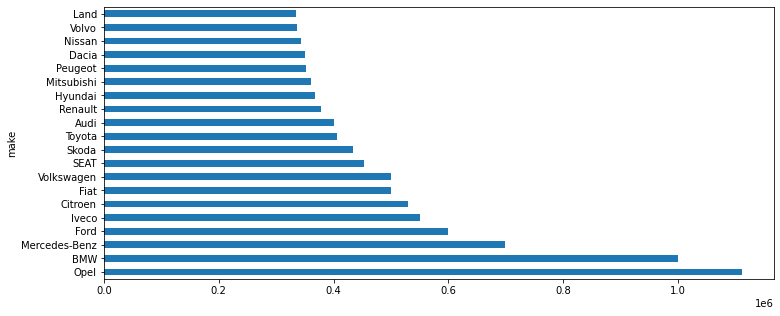

In [10]:
##### Find out, which car was given the max mileage #####
print(df.groupby(['make'])['mileage'].max().sort_values(ascending = False))
print('*'*120)

print('Plot the top 10 cars from the group.\n')
plt.figure(figsize = (12, 5))
df.groupby(['make'])['mileage'].max().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.show()

make
Trucks-Lkw    312000
DAF           183000
Brilliance    100524
Iveco          92500
Isuzu          56000
               ...  
Nissan             0
Hyundai            0
Kia                0
Abarth             0
Lada               0
Name: mileage, Length: 77, dtype: int64
************************************************************************************************************************
Plot the top 10 cars from the group.



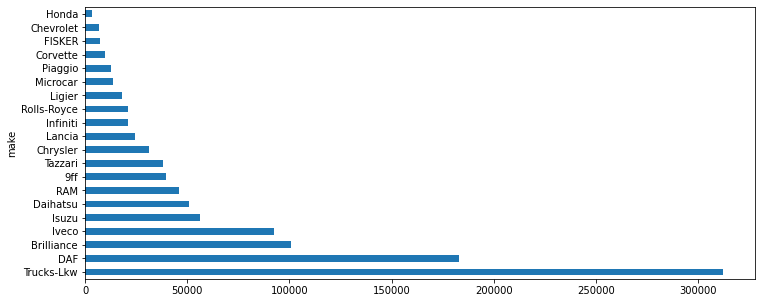

In [11]:
##### Find out, which car was given the min mileage #####
print(df.groupby(['make'])['mileage'].min().sort_values(ascending = False))
print('*'*120)

print('Plot the top 10 cars from the group.\n')
plt.figure(figsize = (12, 5))
df.groupby(['make'])['mileage'].min().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.show()

make
Trucks-Lkw          312000.000000
Iveco               271616.000000
DAF                 183000.000000
Infiniti            130396.600000
Lancia              122409.111111
                        ...      
Zhidou                3000.000000
Polestar              2025.000000
Aixam                  403.333333
Estrima                225.000000
Trailer-Anhänger        25.750000
Name: mileage, Length: 77, dtype: float64
************************************************************************************************************************
Plot the top 10 cars from the group.



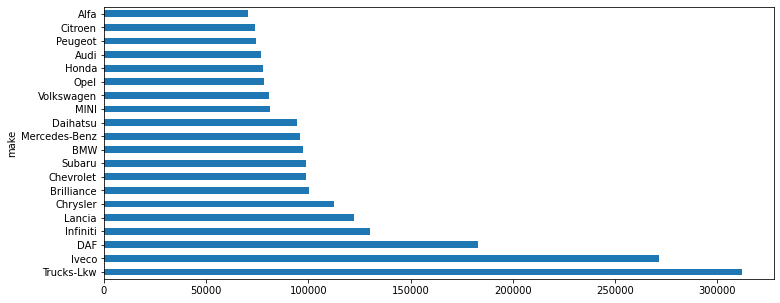

In [12]:
##### Find out, which car was given the min mileage #####
print(df.groupby(['make'])['mileage'].mean().sort_values(ascending = False))
print('*'*120)

print('Plot the top 10 cars from the group.\n')
plt.figure(figsize = (12, 5))
df.groupby(['make'])['mileage'].mean().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.show()

In [13]:
##### Create a new column for analysing the data #####

df['cars_with_model'] = df.loc[:, 'make'] + " "+ df.loc[:, 'model']

df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,cars_with_model
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,BMW 316
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,Volkswagen Golf
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,SEAT Exeo
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,Renault Megane
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,Peugeot 308


cars_with_model
Volkswagen Golf              136873310
Opel Astra                   120432690
Ford Focus                    82496066
Opel Corsa                    82022911
Ford Fiesta                   67592059
Skoda Octavia                 63825021
Volkswagen Polo               60888026
Volkswagen Passat Variant     56421505
Volkswagen up!                52013680
Skoda Fabia                   51119217
Name: mileage, dtype: int64
************************************************************************************************************************
Plot the top 10 cars from the group.



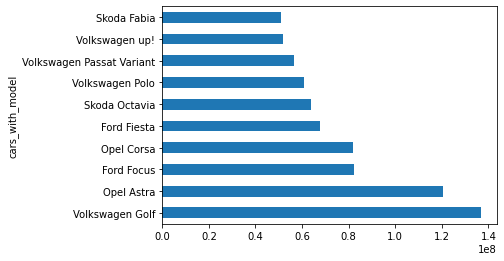

In [14]:
##### Print the cars with the highest mileage #####
print(df.groupby(['cars_with_model'])['mileage'].sum().sort_values(ascending = False).head(10))
print('*'*120)

print('Plot the top 10 cars from the group.\n')

df.groupby(['cars_with_model'])['mileage'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.show()

The relationship of mileage and price is given below.



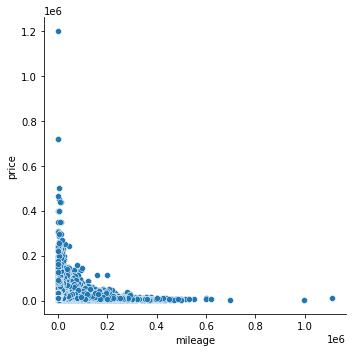

The relationship of cars and price.



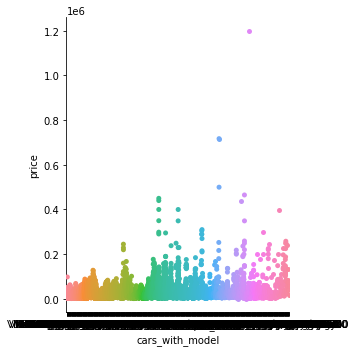

In [15]:
##### Plot the relationship of mileage and price #####
print('The relationship of mileage and price is given below.\n')
sns.relplot(x = 'mileage', y = 'price', data = df)
plt.show()

print('The relationship of cars and price.\n')

sns.catplot(x = 'cars_with_model', y = 'price', data = df)
plt.show()

Gasoline             28864
Diesel               15244
Electric/Gasoline     1158
Electric               758
LPG                    126
CNG                    117
Others                  56
Electric/Diesel         53
-/- (Fuel)              26
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64
************************************************************************************************************************
Plot the value counts of fuel.



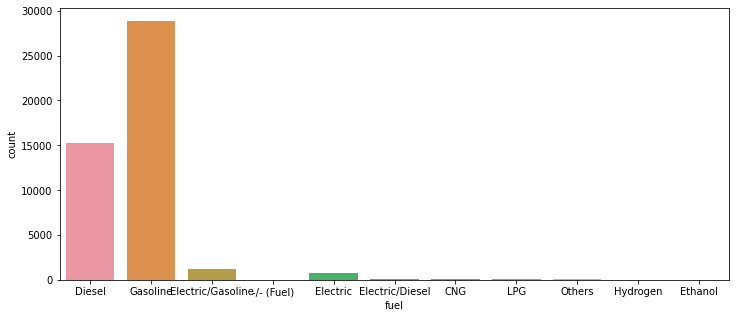

In [16]:
##### show the value counts of the fuel #####

print(df.loc[:, 'fuel'].value_counts())
print('*'*120)

##### Plot the value counts of the fuel #####
print('Plot the value counts of fuel.\n')
plt.figure(figsize = (12, 5))
sns.countplot(df.loc[:, 'fuel'])
plt.show()

The relationship of between of fuel and mileage.



<Figure size 360x1440 with 0 Axes>

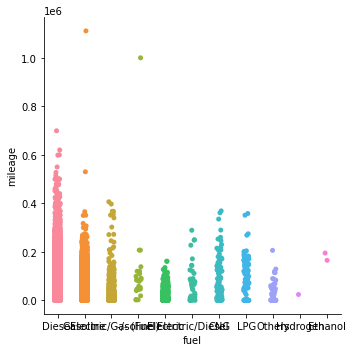

In [17]:
##### The relationship of fuel and mileage #####
print('The relationship of between of fuel and mileage.\n')
plt.figure(figsize = (5, 20))
sns.catplot(x = 'fuel', y = 'mileage', data = df)
plt.show()

he relationship of mileage, price and fuel is given below.



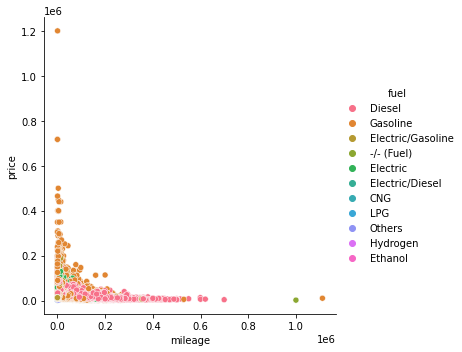

he relationship of mileage, price and fuel is given below.



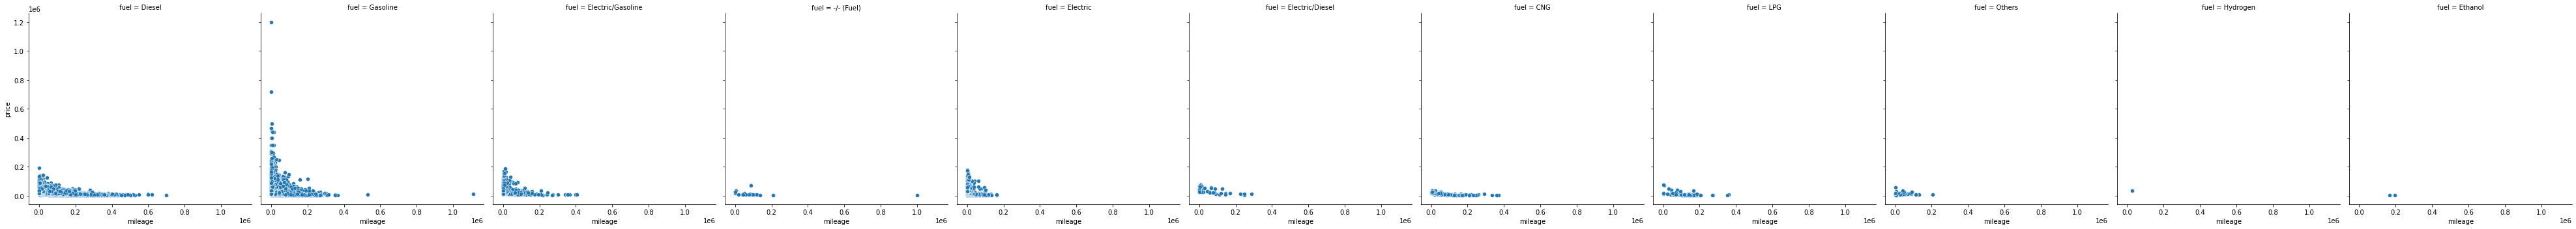

he relationship of mileage, price and fuel is given below.



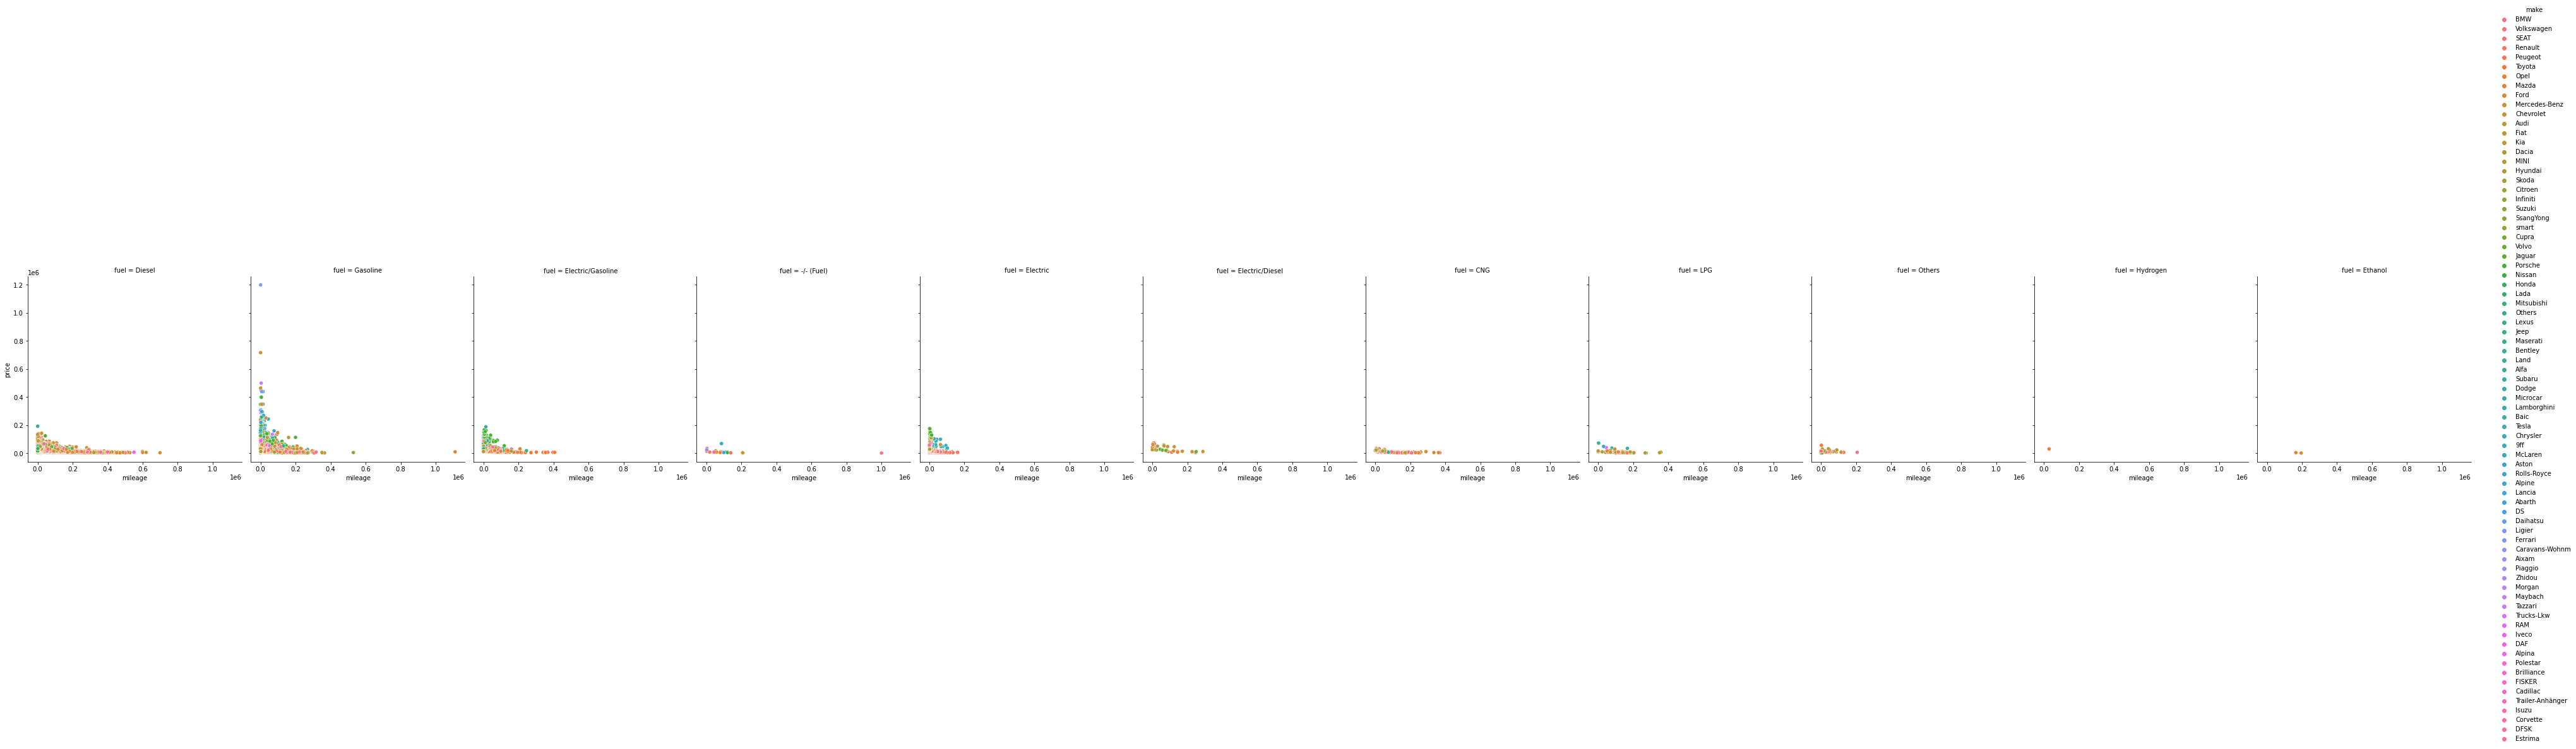

In [18]:
##### Plot the relationship of mileage, price and fuel #####
print('he relationship of mileage, price and fuel is given below.\n')
sns.relplot(x = 'mileage', y = 'price', hue = 'fuel', data = df)
plt.show()

##### Plot the relationship of mileage, price and fuel individually #####
print('he relationship of mileage, price and fuel is given below.\n')
sns.relplot(x = 'mileage', y = 'price', col = 'fuel', data = df)
plt.show()

##### Plot the relationship of mileage, price and fuel individually with cars #####
print('he relationship of mileage, price and fuel is given below.\n')
sns.relplot(x = 'mileage', y = 'price', col = 'fuel', hue = 'make', data = df)
plt.show()

In [19]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,cars_with_model
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,BMW 316
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,Volkswagen Golf
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,SEAT Exeo
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,Renault Megane
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,Peugeot 308


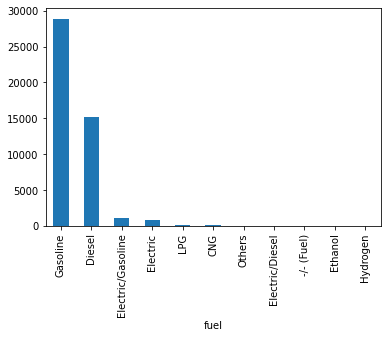

In [20]:
##### Show the which fuel most used in the cars #####
df.groupby(['fuel'])['make'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [21]:
##### Find out, the maximum price in BMW based on fuel #####
def max_price_BMW(group):
  return group[group.loc[:, 'make'] == 'BMW']['price'].max()

groupby_fuel_ = df.groupby(['fuel'])

groupby_fuel_.apply(max_price_BMW).sort_values(ascending = False).reset_index().rename(columns = {0: 'max_price_BMW'})

,fuel,max_price_BMW
0,Gasoline,184450.0
1,Electric/Gasoline,113890.0
2,Diesel,113880.0
3,Electric/Diesel,66850.0
4,Electric,58000.0
5,Others,6900.0
6,-/- (Fuel),1999.0
7,CNG,NaN
8,Ethanol,NaN
9,Hydrogen,NaN


In [22]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,cars_with_model
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,BMW 316
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,Volkswagen Golf
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,SEAT Exeo
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,Renault Megane
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,Peugeot 308


In [23]:
##### Find out, the top 10 cars based on mileage and which fuel they used #####

top_10_cars_ = df.groupby(['make'])['mileage'].sum().sort_values(ascending = False).head(10).index

print(f'Top 10 cars based on mileage is {list(top_10_cars_)}')

new_df = df[df.loc[:, 'make'].isin(top_10_cars_)]

new_df.groupby(['fuel'])['make'].count().sort_values(ascending = False).reset_index()

Top 10 cars based on mileage is ['Volkswagen', 'Opel', 'Ford', 'BMW', 'Mercedes-Benz', 'Audi', 'Skoda', 'Renault', 'SEAT', 'Hyundai']


,fuel,make
0,Gasoline,19568
1,Diesel,12439
2,Electric,485
3,Electric/Gasoline,413
4,CNG,111
5,LPG,61
6,Electric/Diesel,34
7,Others,30
8,-/- (Fuel),18
9,Ethanol,2


In [24]:
##### Find, out the mileage which cars used top 10 fuel #####

top_10_fuel = new_df.groupby(['fuel'])['make'].count().sort_values(ascending = False).index

print('The top 10 fuel is used: ', list(top_10_fuel))

new_df = df[df.loc[:, 'fuel'].isin(top_10_fuel)]

def find_mileage(group):
  
  return group[group['mileage'].max() == group['mileage']][['mileage', 'make']]

new_df.groupby(['fuel']).apply(find_mileage).sort_values(by = 'mileage', ascending = False)

The top 10 fuel is used:  ['Gasoline', 'Diesel', 'Electric', 'Electric/Gasoline', 'CNG', 'LPG', 'Electric/Diesel', 'Others', '-/- (Fuel)', 'Ethanol']


,,mileage,make
fuel,,,
Gasoline,16869,1111111,Opel
-/- (Fuel),38049,999999,BMW
Diesel,34744,699000,Mercedes-Benz
Electric/Gasoline,32019,406360,Toyota
CNG,409,368777,Volkswagen
LPG,12911,358000,Hyundai
Electric/Diesel,11866,289000,Mercedes-Benz
Others,19662,206000,BMW
Ethanol,34718,195000,Ford


Manual            30380
Automatic         15787
Semi-automatic       56
Name: gear, dtype: int64
************************************************************************************************************************
The plot of value counts is given below.



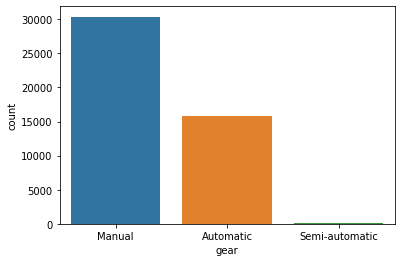

In [25]:
##### show the value counts of the gear feature #####

print(df.loc[:, 'gear'].value_counts())
print('*'*120)

##### Plot the value counts of this gear feature #####
print('The plot of value counts is given below.\n')
sns.countplot(df.loc[:, 'gear'])
plt.show()

The relationship of gear and mileage is given below.



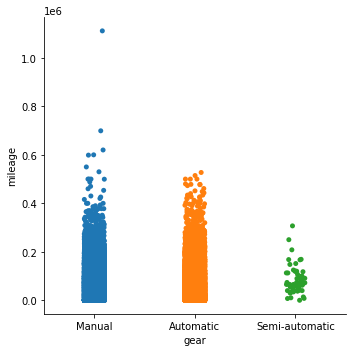

The relationship of gear and mileage is given below.



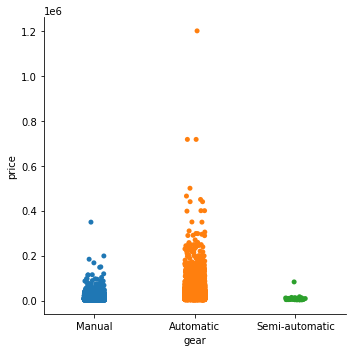

Clearily see that, automatic gear cars have the most price.



In [26]:
##### Find out, the mileage based on the gear #####
print('The relationship of gear and mileage is given below.\n')
sns.catplot(x = 'gear', y = 'mileage', data = df)
plt.show()

##### Find out, the the gear with the price #####
print('The relationship of gear and mileage is given below.\n')
sns.catplot(x = 'gear', y = 'price', data = df)
plt.show()

print('Clearily see that, automatic gear cars have the most price.\n')

In [27]:
##### Find out, which top 5 car based on mileage has the manual, automatic and semi-automatic #####

def find_gear(group):

  return group[group['mileage'].isin(group['mileage'].nlargest(5))]

groupby_ = df.groupby(['gear'])

groupby_.apply(find_gear).sort_values(by = 'mileage', ascending = False)[['mileage', 'make', 'price']]

mileage           make  price
gear                                               
Manual         16869  1111111           Opel  10490
               34744   699000  Mercedes-Benz   3990
               25438   620000  Mercedes-Benz   6500
               13955   599900           Ford   5990
               12768   598744  Mercedes-Benz  13078
Automatic      4039    527205  Mercedes-Benz   4899
               4529    514614  Mercedes-Benz   7200
               29198   500000     Volkswagen   4000
               31127   500000     Volkswagen   4000
               25030   499900     Volkswagen   5990
Semi-automatic 35958   307000  Mercedes-Benz   5900
               36044   250000           Ford   4390
               35258   208232     Volkswagen   9989
               31331   169000           Audi   7200
               3445    168000           Audi  11500

In [28]:
##### Find out, which top 5 car based on price has the manual, automatic and semi-automatic #####

def find_gear(group):

  return group[group['mileage'].isin(group['mileage'].nlargest(5))]

groupby_ = df.groupby(['gear'])

groupby_.apply(find_gear).sort_values(by = 'price', ascending = False)[['mileage', 'make', 'price']]

,,mileage,make,price
gear,,,,
Manual,12768,598744,Mercedes-Benz,13078
Semi-automatic,3445,168000,Audi,11500
Manual,16869,1111111,Opel,10490
Semi-automatic,35258,208232,Volkswagen,9989
Automatic,4529,514614,Mercedes-Benz,7200
Semi-automatic,31331,169000,Audi,7200
Manual,25438,620000,Mercedes-Benz,6500
Automatic,25030,499900,Volkswagen,5990
Manual,13955,599900,Ford,5990


Used              40122
Pre-registered     2780
Demonstration      2368
Employee's car     1122
New                  13
Name: offerType, dtype: int64
************************************************************************************************************************
Plot the value counts of offer type.



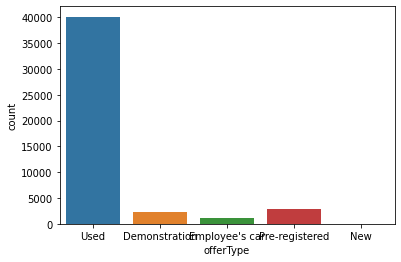

In [29]:
##### Show the value counts of offerType #####

print(df.loc[:, 'offerType'].value_counts())
print('*'*120)

print('Plot the value counts of offer type.\n')
sns.countplot(df.loc[:, 'offerType'])
plt.show()

The relationship between offerType and mileage.



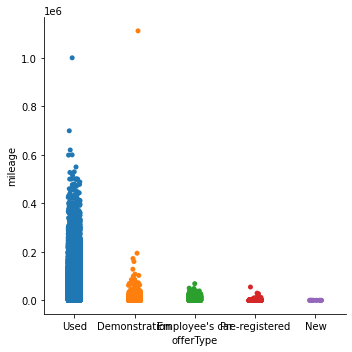

The relationship between offerType and price.



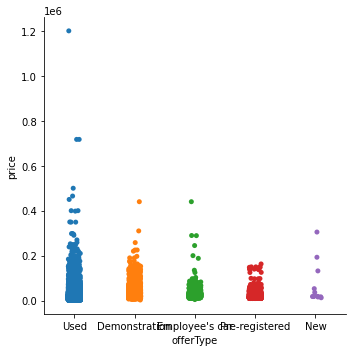

The relationship between offerType and mileage.



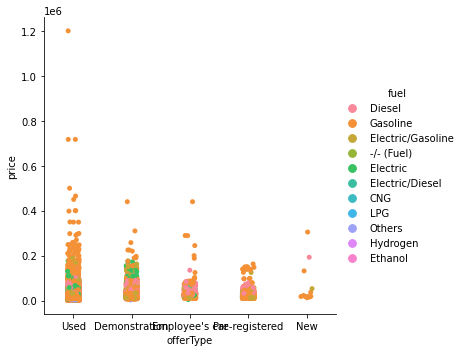

The relationship between offerType and mileage.



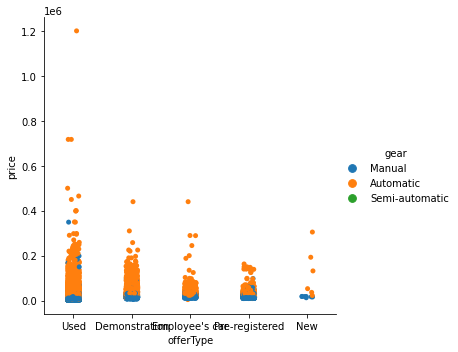

In [30]:
##### Show the relationship of offerType and mileage #####
print('The relationship between offerType and mileage.\n')
sns.catplot(x = 'offerType', y = 'mileage', data = df)
plt.show()

##### Show the relationship of offerType and price #####
print('The relationship between offerType and price.\n')
sns.catplot(x = 'offerType', y = 'price', data = df)
plt.show()

##### Show the relationship of offerType and price and fuel #####
print('The relationship between offerType and mileage.\n')
sns.catplot(x = 'offerType', y = 'price', hue = 'fuel', data = df)
plt.show()

##### Show the relationship of offerType and price and gear #####
print('The relationship between offerType and mileage.\n')
sns.catplot(x = 'offerType', y = 'price', hue = 'gear', data = df)
plt.show()

,offerType,price
0,Demonstration,34959.578125
1,Employee's car,30389.130125
2,New,66123.769231
3,Pre-registered,21146.255396
4,Used,14767.763945


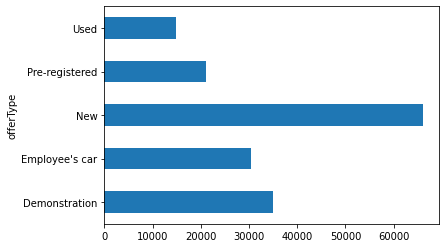

In [31]:
##### Find out, the offertype with mean the price #####
df.groupby(['offerType'])['price'].mean().plot(kind = 'barh')

df.groupby(['offerType'])['price'].mean().reset_index()

In [32]:
##### Find out, the relationship of offerType and fuel with the price #####

def find_price(group):
  return group['price'].max()

df.groupby(['offerType', 'fuel']).apply(find_price).reset_index().sort_values(by = 0, ascending = False).head(10).rename(columns = {0: 'Price'})

,offerType,fuel,Price
33,Used,Gasoline,1199900
13,Employee's car,Gasoline,439900
5,Demonstration,Gasoline,439900
17,New,Gasoline,304900
15,New,Diesel,192780
31,Used,Electric/Gasoline,188888
29,Used,Electric,176980
2,Demonstration,Electric,175990
23,Pre-registered,Gasoline,162900
4,Demonstration,Electric/Gasoline,162900


The distribution of hp is given below.



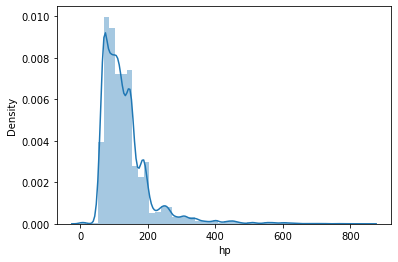

In [33]:
##### Find out, the distribution of hp #####
print('The distribution of hp is given below.\n')
sns.distplot(df.loc[:, 'hp'])
plt.show()

The relationship between hp and mileage is given below.



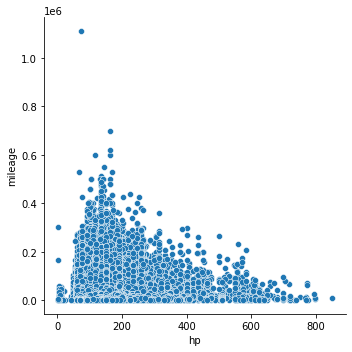

The relationship between hp and mileage is given below.



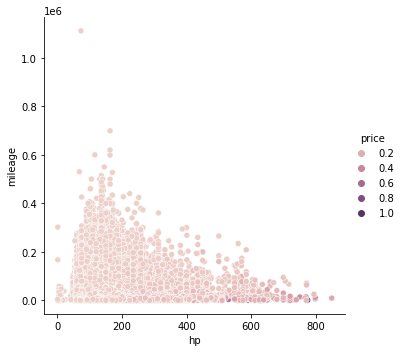

In [34]:
##### Plot the relationship of hp and mileage #####
print('The relationship between hp and mileage is given below.\n')
sns.relplot(x = 'hp', y = 'mileage', data = df)
plt.show()

##### Plot the relationship of hp and mileage and price #####
print('The relationship between hp and mileage is given below.\n')
sns.relplot(x = 'hp', y = 'mileage', hue = 'price', data = df)
plt.show()

In [35]:
##### Find out, the maximum price and its hp #####
print('Max price and hp: ', df[df.loc[:, 'price'].max() == df.loc[:, 'price']]['price'], df[df.loc[:, 'price'].max() == df.loc[:, 'price']]['hp'])
##### Find out, the minimum price and its hp #####
print('Max price and hp: ', df[df.loc[:, 'price'].max() == df.loc[:, 'price']]['price'], df[df.loc[:, 'price'].min() == df.loc[:, 'price']]['hp'])

Max price and hp:  21675    1199900
Name: price, dtype: int64 21675    775.0
Name: hp, dtype: float64
Max price and hp:  21675    1199900
Name: price, dtype: int64 23464    68.0
Name: hp, dtype: float64


In [36]:
##### What's the average hp and price of this dataset #####
print('The average price of this dataset is = ', df.loc[:, 'price'].mean(),'\n')
print('The average hp of this dataset is    = ', df.loc[:, 'hp'].mean(),'\n')

The average price of this dataset is =  16572.33722659196 

The average hp of this dataset is    =  132.99098671726756 



In [37]:
##### Find out, the price base on offerType as well as make ######
def find_cars(group):

  return group['make'].count()

new_df = df.groupby(['offerType','make']).apply(find_cars).sort_values(ascending = False).reset_index()
new_df.rename(columns = {0: 'price'})

,offerType,make,price
0,Used,Volkswagen,6321
1,Used,Opel,4512
2,Used,Ford,3761
3,Used,Audi,2462
4,Used,Renault,2371
...,...,...,...
190,Employee's car,Mitsubishi,1
191,Employee's car,Lamborghini,1
192,Used,FISKER,1
193,Used,Isuzu,1


The distribution of year is given below.



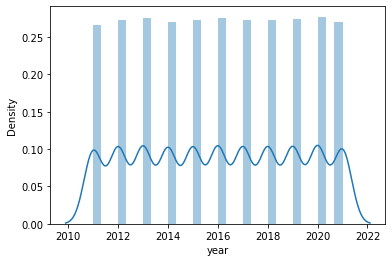

In [38]:
##### plot the distribution of year #####
print('The distribution of year is given below.\n')
sns.distplot(df.loc[:, 'year'], kde = True)
plt.show()

The scatter plot of hp and price is given below.



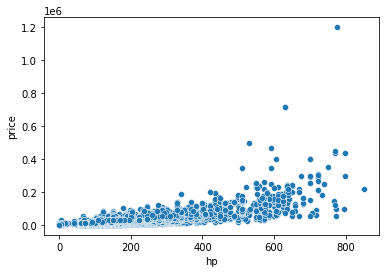

The scatter plot of hp and price is given below.



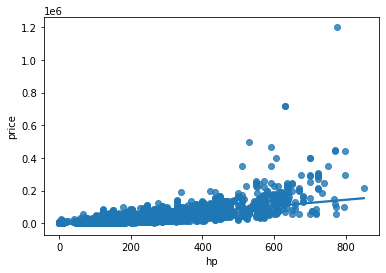

It is surprised to see that, hp and price is quite linear relation.


In [39]:
##### plot the scatter plot of hp and price #####
print('The scatter plot of hp and price is given below.\n')
sns.scatterplot(x = 'hp', y = 'price', data = df)
plt.show()

##### plot the scatter plot of hp and price #####
print('The scatter plot of hp and price is given below.\n')
sns.regplot(x = 'hp', y = 'price', data = df)
plt.show()

print('It is surprised to see that, hp and price is quite linear relation.')

The pairplot is given below.



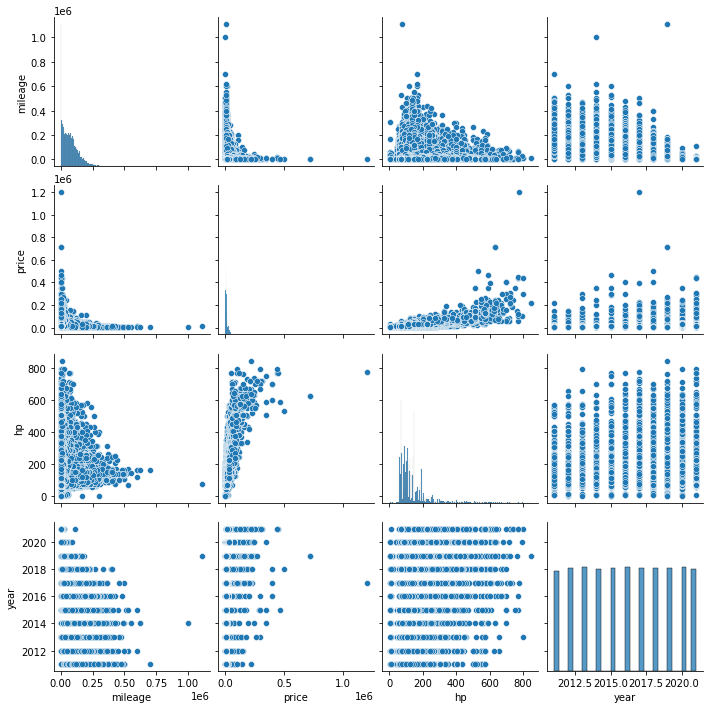

In [40]:
##### plot the pairplot of this dataset #####
print('The pairplot is given below.\n')
sns.pairplot(df)
plt.show()

In [41]:
##### show the correlation of the dataset #####
df.corr()

,mileage,price,hp,year
mileage,1.000000,-0.302788,-0.015086,-0.676131
price,-0.302788,1.000000,0.747617,0.405633
hp,-0.015086,0.747617,1.000000,0.167232
year,-0.676131,0.405633,0.167232,1.000000


The heatmap of the correlation of the dataset is.



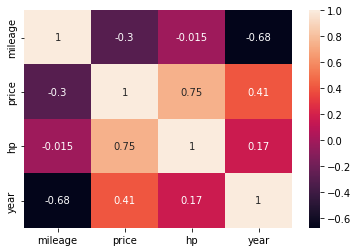

It is surprised to see that, there is not any multicollinearity in this dataset, specially in the numerical features.


In [42]:
##### plot this correlation of the dataset #####
print('The heatmap of the correlation of the dataset is.\n')
sns.heatmap(df.corr(), annot = True)
plt.show()

print('It is surprised to see that, there is not any multicollinearity in this dataset, specially in the numerical features.')

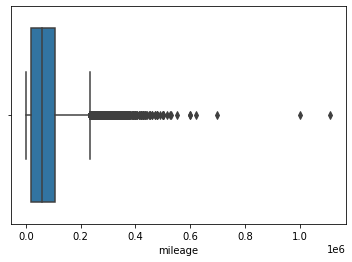

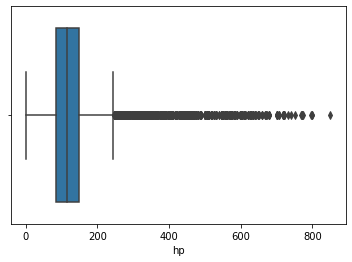

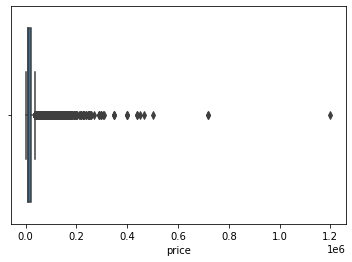

It is surprised to see that, all the columns that I used to check for the outliers have outliers.


In [43]:
##### Find out the outliers in this dataset #####
columns_ = ['mileage', 'hp', 'price']

for column_ in columns_:
  sns.boxplot(df.loc[:, column_])
  plt.show()

print('It is surprised to see that, all the columns that I used to check for the outliers have outliers.')

In [44]:
df.head(3)

,mileage,make,model,fuel,gear,offerType,price,hp,year,cars_with_model
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,BMW 316
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,Volkswagen Golf
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,SEAT Exeo


In [45]:
##### Find out, min max and mean based on fuel #####
df.groupby(['fuel']).agg({
    'mileage':['min', 'max', 'mean'],
    'price'  :['min', 'max', 'mean'],
    'hp'     :['min', 'max', 'mean'],
    'make'   :'count'
})

mileage                          price           \
                      min      max           mean    min      max   
fuel                                                                
-/- (Fuel)           1500   999999  111009.923077   1999    69700   
CNG                    10   368777   80299.948718   1832    34451   
Diesel                  0   699000  108798.690239   1299   192780   
Electric                0   161300   23124.228232   1950   176980   
Electric/Diesel        10   289000   53432.433962   5100    74800   
Electric/Gasoline       0   406360   26568.164076   5000   188888   
Ethanol            165000   195000  180000.000000   2000     4900   
Gasoline                0  1111111   54290.965805   1100  1199900   
Hydrogen            27000    27000   27000.000000  34990    34990   
LPG                     5   358000   92695.960317   1500    73200   
Others                  1   206000   34875.928571   2450    56990   

                                    hp                      make  
                           mean    min    max        mean  count  
fuel                                                              
-/- (Fuel)         14473.346154   60.0  562.0  147.681818     26  
CNG                12558.136752   68.0  170.0  104.794872    117  
Diesel             18112.008266    1.0  519.0  152.942994  15244  
Electric           23004.944591    3.0  795.0  129.299465    758  
Electric/Diesel    37605.018868  136.0  374.0  214.283019     53  
Electric/Gasoline  29694.614853    1.0  680.0  170.218480   1158  
Ethanol             3450.000000  120.0  125.0  122.500000      2  
Gasoline           15073.637368   11.0  850.0  121.172270  28864  
Hydrogen           34990.000000  154.0  154.0  154.000000      1  
LPG                11340.761905   60.0  401.0  112.840000    126  
Others             12870.946429    1.0  247.0   91.196429     56

In [46]:
##### Find out, the price price based on cars_with_model and hp #####
df.groupby(['cars_with_model', 'hp'])['price'].apply(lambda x: x.max()).reset_index().sort_values(by = ['hp'], ascending = [False]).head(10)

,cars_with_model,hp,price
1955,Mercedes-Benz G 63 AMG,850.0,216619
267,Audi R8,799.0,295000
869,Ferrari 812,799.0,439900
870,Ferrari F12,775.0,1199900
3034,Tesla Model X,772.0,99999
3031,Tesla Model S,772.0,54450
1136,Ford Mustang,771.0,121000
1550,Lamborghini Aventador,770.0,449900
769,Corvette Z06,767.0,148600
1549,Lamborghini Aventador,751.0,349800


Handling the missing values in this dataset.

Before using mean to fill the NaN value in hp feature


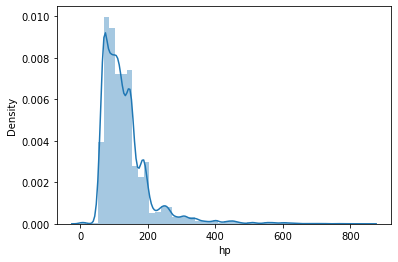

In [47]:
print('Before using mean to fill the NaN value in hp feature')
sns.distplot(df.loc[:, 'hp'])
plt.show()

In [48]:
##### Use mean to fill the missing value in the hp feature #####
df.loc[:, 'hp'].fillna(round(df.loc[:, 'hp'].mean(), 2), inplace = True)
print('Missing value filled with the mean value in the hp feature.\n')

##### Here, model and gear column is quite tricky, so we use the new attribute to fill the missing value that would be 'missing' #####

df.loc[:, 'cars_with_model'].fillna('missing', inplace = True)
df.loc[:, 'gear'].fillna('missing', inplace = True)

print('Missing value filled with the new attribute named missing in the model and gear feature.\n')

Missing value filled with the mean value in the hp feature.

Missing value filled with the new attribute named missing in the model and gear feature.



In [49]:
##### Check NaN vaule removed or not #####
if df.iloc[:, :-1].isnull().sum().sum() == 0:

  print('NaN value filled with some approach.')

else:
  
  print('Still there is NaN value in the dataset.')

Still there is NaN value in the dataset.


After using mean to fill the NaN value in hp feature


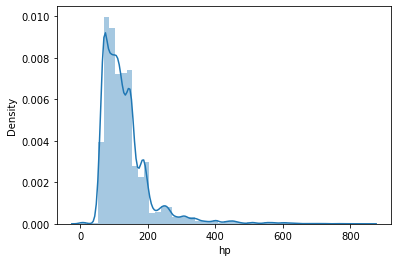

In [50]:
print('After using mean to fill the NaN value in hp feature')
sns.distplot(df.loc[:, 'hp'])
plt.show()

Handling the categorical data to the numerical data so that machine can understand.

In [51]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,cars_with_model
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,BMW 316
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,Volkswagen Golf
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,SEAT Exeo
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,Renault Megane
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,Peugeot 308


In [52]:
print('The unique attribute in the cars_with_model feature is {}'.format(df.loc[:, 'cars_with_model'].nunique(),'\n'))
print('The unique attribute in the fuel feature is {}'.format(df.loc[:, 'fuel'].nunique(),'\n'))
print('The unique attribute in the gear feature is {}'.format(df.loc[:, 'gear'].nunique(),'\n'))
print('The unique attribute in the offerType feature is {}'.format(df.loc[:, 'offerType'].nunique(),'\n'))

##### Here, except cars_with_model and fuel, all the categorical features should be used one hot encoding #####

##### Do the cars_with_model features mean encoding technique #####
df.loc[:, 'cars_with_model'] = df.loc[:, 'cars_with_model'].map(df.groupby(['cars_with_model'])['price'].mean().to_dict())
print('Mean Encoding is done in the cars_with_model features.\n')

##### Do the fuel features target guided ordinal encoding technique #####
df.loc[:, 'fuel'] = df.loc[:, 'fuel'].map({key_: value_ for value_, key_ in enumerate(df.groupby(['fuel'])['price'].mean().sort_values(ascending = True).index)})
print('Target Guided Ordinal Encoding is done in the fuel features.\n')

The unique attribute in the cars_with_model feature is 851
The unique attribute in the fuel feature is 11
The unique attribute in the gear feature is 4
The unique attribute in the offerType feature is 5
Mean Encoding is done in the cars_with_model features.

Target Guided Ordinal Encoding is done in the fuel features.



In [53]:
##### drop the make, model and year column from the dataset #####
df.drop(['make', 'model', 'year'], axis = 1, inplace = True)
print('make and model column has been deleted in the dataset.')

df.head()

make and model column has been deleted in the dataset.


,mileage,fuel,gear,offerType,price,hp,cars_with_model
0,235000,6,Manual,Used,6800,116.0,11731.979592
1,92800,5,Manual,Used,6877,122.0,13540.550268
2,149300,5,Manual,Used,6900,160.0,5678.800000
3,96200,5,Manual,Used,6950,110.0,11191.766067
4,156000,5,Manual,Used,6950,156.0,8477.145251


In [54]:
##### Do the One Hot Encoding in the whole dataset #####
new_df = pd.get_dummies(data = df, drop_first = True)
new_df.head()

,mileage,fuel,price,hp,cars_with_model,gear_Manual,gear_Semi-automatic,gear_missing,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,6,6800,116.0,11731.979592,1,0,0,0,0,0,1
1,92800,5,6877,122.0,13540.550268,1,0,0,0,0,0,1
2,149300,5,6900,160.0,5678.800000,1,0,0,0,0,0,1
3,96200,5,6950,110.0,11191.766067,1,0,0,0,0,0,1
4,156000,5,6950,156.0,8477.145251,1,0,0,0,0,0,1


In [55]:
y = new_df.loc[:, 'price']

new_df.drop('price', axis = 1, inplace = True)

new_df.head()

,mileage,fuel,hp,cars_with_model,gear_Manual,gear_Semi-automatic,gear_missing,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,6,116.0,11731.979592,1,0,0,0,0,0,1
1,92800,5,122.0,13540.550268,1,0,0,0,0,0,1
2,149300,5,160.0,5678.800000,1,0,0,0,0,0,1
3,96200,5,110.0,11191.766067,1,0,0,0,0,0,1
4,156000,5,156.0,8477.145251,1,0,0,0,0,0,1


Preprocessing the data and split the dataset into train and test

In [56]:
X = new_df.loc[:]

##### Use Standard Scaler to do the preprocessing #####

standard_scaler_ = StandardScaler()
X = standard_scaler_.fit_transform(X)
y = y/(1199900)

##### Split the data into Train and test #####

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, shuffle = True)

print(f'X_train shape is = {X_train.shape}\n')
print(f'X_test shape is  = {X_test.shape}\n')
print(f'y_train shape is = {y_train.shape}\n')
print(f'y_test shape is  = {y_test.shape}\n')

X_train shape is = (32483, 11)

X_test shape is  = (13922, 11)

y_train shape is = (32483,)

y_test shape is  = (13922,)



Use Machine Learning Technique to evaluate the model and check the performance.

In [57]:
##### Use Linear Regressor to evaluate the model #####
LinearRegression_ = LinearRegression()
LinearRegression_.fit(X_train, y_train)

predicted_ = LinearRegression_.predict(X_test)

print('Mean Squared Error in LR Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in LR Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of LR Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in LR Regressor is   =  2.7279248450407177e-05 

Mean Absolute Error in LR Regressor is  =  0.0029457805948884985 

R2 Score of LR Regressor is =  0.8782611461180285 




,actual,predicted
10449,18950.0,12823.450531
11205,7399.0,5356.396061
8425,37947.0,21559.917313
11692,18490.0,16510.223304
9286,21498.0,30184.790035


In [58]:
##### Use Support Vector Regressor to evaluate the model #####
SVR_ = SVR(kernel = 'poly', C = 10)
SVR_.fit(X_train, y_train)

predicted_ = SVR_.predict(X_test)

print('Mean Squared Error in SVR Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in SVR Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of SVR Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in SVR Regressor is   =  0.00040463117283767426 

Mean Absolute Error in SVR Regressor is  =  0.014797596728207955 

R2 Score of SVR Regressor is =  0.13776012687426498 




,actual,predicted
10262,18590.0,-3525.593442
12670,6990.0,-4279.954182
9314,63450.0,50058.345811
7834,12990.0,-2496.808187
7710,5999.0,-6490.452444


In [59]:
##### Use Decision Tree Regressor to evaluate the model #####
DecisionTreeRegressor_ = RandomForestRegressor(n_estimators = 500)
DecisionTreeRegressor_.fit(X_train, y_train)

predicted_ = DecisionTreeRegressor_.predict(X_test)

print('Mean Squared Error in Rf Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in RF Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of RF Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in Rf Regressor is   =  1.2886906906754096e-05 

Mean Absolute Error in RF Regressor is  =  0.0017901901462246323 

R2 Score of RF Regressor is =  0.9457665166977879 




,actual,predicted
12686,4999.0,6133.591303
4116,9490.0,8711.730000
4674,7490.0,6725.464000
2176,10599.0,10119.652000
3889,6999.0,6974.810033


In [60]:
##### Use Decision Tree Regressor to evaluate the model #####
DecisionTreeRegressor_ = DecisionTreeRegressor()
DecisionTreeRegressor_.fit(X_train, y_train)

predicted_ = DecisionTreeRegressor_.predict(X_test)

print('Mean Squared Error in DT Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in DT Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of DT Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in DT Regressor is   =  4.7140034203314334e-05 

Mean Absolute Error in DT Regressor is  =  0.002330959171247449 

R2 Score of DT Regressor is =  0.8522874760755998 




,actual,predicted
833,31990.0,26950.0
5739,56950.0,67840.0
13316,53150.0,44740.0
843,5900.0,5900.0
12885,74890.0,75900.0


In [61]:
##### Use  Adaboost Regressor to evaluate the model #####
AdaBoostRegressor_ = AdaBoostRegressor()
AdaBoostRegressor_.fit(X_train, y_train)

predicted_ = AdaBoostRegressor_.predict(X_test)

print('Mean Squared Error in ADB Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in ADB Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of ADB Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in ADB Regressor is   =  5.216330994836547e-05 

Mean Absolute Error in ADB Regressor is  =  0.005233902205761873 

R2 Score of ADB Regressor is =  0.7531301145644047 




,actual,predicted
9368,12400.0,13343.299719
2783,32990.0,17285.005052
10566,8499.0,13343.299719
6788,18990.0,14323.164320
1470,29990.0,35763.980759


In [62]:
##### Use GradientBoost Regressor to evaluate the model #####
GradientBoostingRegressor_ = GradientBoostingRegressor()
GradientBoostingRegressor_.fit(X_train, y_train)

predicted_ = GradientBoostingRegressor_.predict(X_test)

print('Mean Squared Error in GB Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in GB Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of GB Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in GB Regressor is   =  1.5662808217143896e-05 

Mean Absolute Error in GB Regressor is  =  0.0021417067929228365 

R2 Score of GB Regressor is =  0.9360597872243329 




,actual,predicted
6207,5900.0,8613.835834
1997,14190.0,13537.177958
4993,6400.0,6142.446606
1678,9999.0,13711.641726
1468,25950.0,25207.132767


In [63]:
##### Use GradientBoost Regressor to evaluate the model #####
XGBRegressor_ = XGBRegressor()
XGBRegressor_.fit(X_train, y_train)

predicted_ = XGBRegressor_.predict(X_test)

print('Mean Squared Error in XGB Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in XGB Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of XGB Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

[11:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error in XGB Regressor is   =  1.537307845577237e-05 

Mean Absolute Error in XGB Regressor is  =  0.0021520642295041717 

R2 Score of XGB Regressor is =  0.9356736425899047 




,actual,predicted
11511,6800.0,5941.384593
10961,4500.0,4370.062929
7387,19900.0,19324.778304
11451,21499.0,17646.963936
10560,4990.0,5738.376170


In [64]:
##### Use VotingRegressor to evaluate the model #####
estimators_ = [
  ('DTR', DecisionTreeRegressor()),
  ('RFR', RandomForestRegressor()),
  ('XGB', XGBRegressor())
]
VotingRegressor_ = VotingRegressor(estimators = estimators_, n_jobs = -1)
VotingRegressor_.fit(X_train, y_train)

predicted_ = VotingRegressor_.predict(X_test)

print('Mean Squared Error in VR Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in VR Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of VR Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in VR Regressor is   =  1.4180089462438498e-05 

Mean Absolute Error in VR Regressor is  =  0.0018708063013391995 

R2 Score of VR Regressor is =  0.9425577753006674 




,actual,predicted
8762,6590.0,7962.902285
13065,5900.0,5309.954921
1108,14900.0,12764.686540
12136,4390.0,6275.206221
5053,32500.0,16547.812304


In [65]:
##### StackingRegressor to evaluate the model #####
estimators_ = [
  ('DTR', DecisionTreeRegressor()),
  ('RFR', RandomForestRegressor()),
  ('XGB', XGBRegressor())
]

StackingRegressor_ = StackingRegressor(estimators = estimators_, final_estimator = DecisionTreeRegressor(), cv = 10, n_jobs = -1)
StackingRegressor_.fit(X_train, y_train)

predicted_ = StackingRegressor_.predict(X_test)

print('Mean Squared Error in SBR Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in SBR Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of SBR Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in SBR Regressor is   =  4.051663265584386e-05 

Mean Absolute Error in SBR Regressor is  =  0.002706436176847786 

R2 Score of SBR Regressor is =  0.8677224906742071 




,actual,predicted
7197,34550.0,30450.0
7290,7495.0,7690.0
3185,13650.0,12990.0
5336,12370.0,12890.0
10032,22490.0,20690.0


In [66]:
##### Use KFold Cross Validation to evalaute the model and prevent the overfitting #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
MSE_, MAE_, r2_score_, count_ = [], [], [], 1

for train_index_, test_index_ in KFold_.split(X, y):

  print(f'# of Cross validation {count_} is running.\n')

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  DecisionTreeRegressor_ = RandomForestRegressor()
  DecisionTreeRegressor_.fit(X_train, y_train)

  predicted_ = DecisionTreeRegressor_.predict(X_test)

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  r2_score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

# of Cross validation 1 is running.

# of Cross validation 2 is running.

# of Cross validation 3 is running.

# of Cross validation 4 is running.

# of Cross validation 5 is running.

# of Cross validation 6 is running.

# of Cross validation 7 is running.

# of Cross validation 8 is running.

# of Cross validation 9 is running.

# of Cross validation 10 is running.



In [67]:
print('Mean Squared Error in KFold Regressor is   = ',np.array(MSE_).mean(),'\n')
print('Mean Absolute Error in KFold Regressor is  = ', np.array(MAE_).mean(),'\n')
print('R2 Score of KFold Regressor is = ', np.array(r2_score_).mean(),'\n\n')

Mean Squared Error in KFold Regressor is   =  1.8747729245989165e-05 

Mean Absolute Error in KFold Regressor is  =  0.0017693897930530418 

R2 Score of KFold Regressor is =  0.9208100365953673 




Use Feed Foward Neural Network = ANN (Deep Learning) to train and evaluate the model.

In [68]:
##### Create a sequential model #####

model = Sequential()

##### Create first hidden layer with 256 neurons #####

model.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X.shape[1]))

##### Create second hidden layer with 128 neurons #####

model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

##### Create last hidden layer with 64 neurons #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))

##### Create an output layer with activation linear #####

model.add(Dense(units = 1, activation = 'linear'))

##### Compile the model #####

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

##### show the summary of the model #####

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44,289
Trainable params: 44,289
Non-trainable params: 0
_________________________________________________________________


In [69]:
history_ = model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 64, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
653/653 [==============================] - 3s 3ms/step - loss: 0.1870 - val_loss: 0.0017
Epoch 2/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0401 - val_loss: 0.0010
Epoch 3/100
653/653 [==============================] - 2s 2ms/step - loss: 6.1005e-04 - val_loss: 5.2481e-04
Epoch 4/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 5/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 6/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0043 - val_loss: 0.0049
Epoch 7/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0046 - val_loss: 2.4929e-04
Epoch 8/100
653/653 [==============================] - 2s 2ms/step - loss: 1.1594e-04 - val_loss: 1.1310e-04
Epoch 9/100
653/653 [==============================] - 2s 2ms/step - loss: 8.1649e-05 - val_loss: 8.1487e-05
Epoch 10/100
653/653 [==============================] - 2s 2ms/

In [70]:
predicted_ = model.predict(X_test)

print('Mean Squared Error in SBR Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in SBR Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of SBR Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

145/145 [==============================] - 0s 1ms/step
Mean Squared Error in SBR Regressor is   =  0.0001656351183148698 

Mean Absolute Error in SBR Regressor is  =  0.0023596012222775234 

R2 Score of SBR Regressor is =  0.07059055903942724 




,actual,predicted
242,5899.0,6842.826738
1202,12350.0,11669.640738
99,16350.0,17042.131507
2846,27450.0,32363.143520
1785,6750.0,6119.432670


In [71]:
print('the keys of the history is: '.title(), history_.history.keys())

The Keys Of The History Is:  dict_keys(['loss', 'val_loss'])


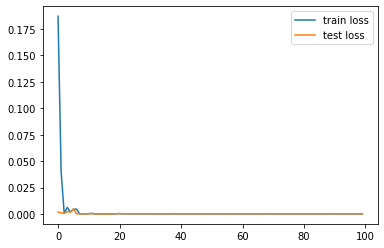

In [72]:
##### plot the train and test loss #####

plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

In [73]:
##### Use KFold Cross Validation to evalaute the model and prevent the overfitting #####

KFold_ = KFold(n_splits = 5, shuffle = True, random_state = 42)
MSE_, MAE_, r2_score_, history_list_, count_ = [], [], [], [], 1

for train_index_, test_index_ in KFold_.split(X, y):

  print(f'# of Cross validation {count_} is running.\n')

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### Fit the model with that feed forward neural network #####

  history_   = model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 256, validation_data = (X_test, y_test), verbose = 1)
  predicted_ = model.predict(X_test)

  ##### Appending MSE, MAE, and R2_Score #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  r2_score_.append(r2_score(predicted_, y_test))
  history_list_.append(history_)

  count_ = count_ + 1

print('The KFold is just completed.\n')

# of Cross validation 1 is running.

Epoch 1/100
146/146 [==============================] - 0s 3ms/step - loss: 4.6230e-05 - val_loss: 5.1055e-05
Epoch 2/100
146/146 [==============================] - 0s 3ms/step - loss: 4.7229e-05 - val_loss: 5.3772e-05
Epoch 3/100
146/146 [==============================] - 0s 3ms/step - loss: 4.5350e-05 - val_loss: 5.1825e-05
Epoch 4/100
146/146 [==============================] - 0s 3ms/step - loss: 4.8361e-05 - val_loss: 6.0982e-05
Epoch 5/100
146/146 [==============================] - 0s 3ms/step - loss: 4.5941e-05 - val_loss: 6.2690e-05
Epoch 6/100
146/146 [==============================] - 0s 3ms/step - loss: 4.8626e-05 - val_loss: 5.7320e-05
Epoch 7/100
146/146 [==============================] - 0s 3ms/step - loss: 4.8682e-05 - val_loss: 5.2814e-05
Epoch 8/100
146/146 [==============================] - 0s 3ms/step - loss: 4.5691e-05 - val_loss: 6.1280e-05
Epoch 9/100
146/146 [==============================] - 0s 3ms/step - loss: 4.6103e-05 - val

In [74]:
##### Evaluate the performance #####
print('Mean Squared Error in KFold Regressor is   = ',np.array(MSE_).mean(),'\n')
print('Mean Absolute Error in KFold Regressor is  = ', np.array(MAE_).mean(),'\n')
print('R2 Score of KFold Regressor is = ', np.array(r2_score_).mean(),'\n\n')

Mean Squared Error in KFold Regressor is   =  5.0376591288118e-05 

Mean Absolute Error in KFold Regressor is  =  0.002499270461060156 

R2 Score of KFold Regressor is =  0.7633666683208622 





KFold 1 history is given below.




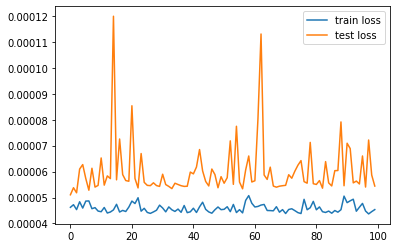


KFold 2 history is given below.




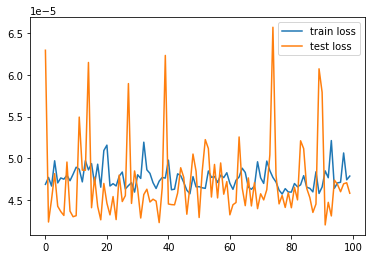


KFold 3 history is given below.




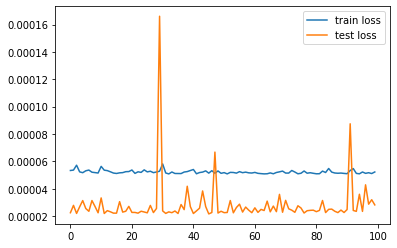


KFold 4 history is given below.




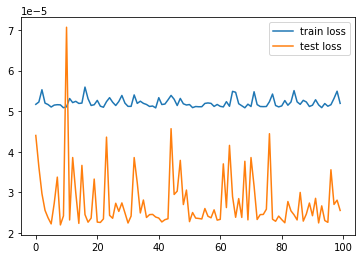


KFold 5 history is given below.




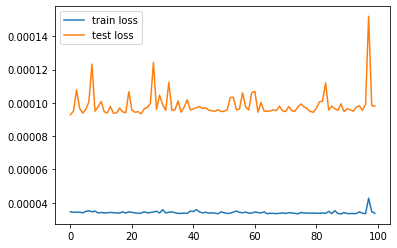

In [75]:
for index_, history_ in enumerate(history_list_):
  print(f'\nKFold {index_ + 1} history is given below.\n\n')
  plt.plot(history_.history['loss'], label = 'train loss')
  plt.plot(history_.history['val_loss'], label = 'test loss')
  plt.legend()
  plt.show()

Use PCA - Principal Component Analysis to Train our faster as well as feature extraction

In [76]:
##### Use PCA - Principal Component Analysis #####
PCA_ = PCA(n_components = None)

PCA_.fit_transform(X)

array([[-1.11436246,  1.40941596, -0.82314678, ..., -0.21801927,
        -0.02957184,  0.19408654],
       [-0.87883602,  0.24224094,  0.45879198, ...,  0.10285636,
        -0.10326525, -0.04869795],
       [-1.01472276,  0.66870948,  0.25889987, ..., -0.40919266,
        -0.66388218, -0.18965988],
       ...,
       [ 1.26984757, -3.74029783, -2.64821241, ...,  1.58414978,
         0.28304213, -0.56892794],
       [ 1.26984757, -3.74029783, -2.64821241, ...,  1.58414978,
         0.28304213, -0.56892794],
       [ 1.26984757, -3.74029783, -2.64821241, ...,  1.58414978,
         0.28304213, -0.56892794]])

In [77]:
##### Explained Variance and ratio #####

print('Explained variance of this PCA is: ', PCA_.explained_variance_,'\n')
print('Explained variance ratio of this PCA is: ', PCA_.explained_variance_ratio_,'\n')

Explained variance of this PCA is:  [2.27213828 1.97253428 1.07321793 1.02401852 1.00528884 0.99842346
 0.97322933 0.6937459  0.54352093 0.22826261 0.21585697] 

Explained variance ratio of this PCA is:  [0.20655357 0.17931743 0.09756316 0.09309059 0.09138793 0.09076381
 0.08847349 0.06306645 0.04940993 0.0207507  0.01962294] 



In [78]:
np.cumsum(PCA_.explained_variance_ratio_)

array([0.20655357, 0.38587101, 0.48343417, 0.57652476, 0.66791268,
       0.7586765 , 0.84714998, 0.91021643, 0.95962636, 0.98037706,
       1.        ])

In [79]:
##### Find 90% variance of PCA #####
PCA_  = PCA(n_components = 8)
X_new = PCA_.fit_transform(X)
y_new = y

##### Split the data into Train and test #####

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.30, random_state = 42, shuffle = True)

print(f'X_train shape is = {X_train.shape}\n')
print(f'X_test shape is  = {X_test.shape}\n')
print(f'y_train shape is = {y_train.shape}\n')
print(f'y_test shape is  = {y_test.shape}\n')

X_train shape is = (32483, 8)

X_test shape is  = (13922, 8)

y_train shape is = (32483,)

y_test shape is  = (13922,)



In [80]:
##### Use Decision Tree Regressor to evaluate the model #####
DecisionTreeRegressor_ = DecisionTreeRegressor()
DecisionTreeRegressor_.fit(X_train, y_train)

predicted_ = DecisionTreeRegressor_.predict(X_test)

print('Mean Squared Error in DT Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in DT Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of DT Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in DT Regressor is   =  3.254079453096282e-05 

Mean Absolute Error in DT Regressor is  =  0.0025757012233277657 

R2 Score of DT Regressor is =  0.8588749760518114 




,actual,predicted
1603,9600.0,10470.0
13887,47689.0,45900.0
12451,9850.0,11900.0
6258,25780.0,26380.0
13497,6390.0,10989.0


In [81]:
##### Use GradientBoost Regressor to evaluate the model #####
XGBRegressor_ = XGBRegressor()
XGBRegressor_.fit(X_train, y_train)

predicted_ = XGBRegressor_.predict(X_test)

print('Mean Squared Error in XGB Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in XGB Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of XGB Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

[11:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error in XGB Regressor is   =  2.29872804394469e-05 

Mean Absolute Error in XGB Regressor is  =  0.0024323802008939677 

R2 Score of XGB Regressor is =  0.8888473916346414 




,actual,predicted
10216,17900.0,16849.734807
10352,8690.0,10028.873530
5685,9750.0,8792.299417
9391,13890.0,13997.175032
5159,5250.0,6982.888961


In [82]:
##### Use GradientBoost Regressor to evaluate the model #####
GradientBoostingRegressor_ = GradientBoostingRegressor()
GradientBoostingRegressor_.fit(X_train, y_train)

predicted_ = GradientBoostingRegressor_.predict(X_test)

print('Mean Squared Error in GB Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in GB Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of GB Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in GB Regressor is   =  1.9915617288400708e-05 

Mean Absolute Error in GB Regressor is  =  0.0023730869241325803 

R2 Score of GB Regressor is =  0.9114472358634761 




,actual,predicted
11654,16890.0,22348.819946
12962,20780.0,15379.595831
12486,9699.0,10520.108442
10570,13650.0,10040.356928
1139,12650.0,13124.463131


In [83]:
##### Use Decision Tree Regressor to evaluate the model #####
DecisionTreeRegressor_ = RandomForestRegressor(n_estimators = 500)
DecisionTreeRegressor_.fit(X_train, y_train)

predicted_ = DecisionTreeRegressor_.predict(X_test)

print('Mean Squared Error in Rf Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in RF Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of RF Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in Rf Regressor is   =  1.7186535699002645e-05 

Mean Absolute Error in RF Regressor is  =  0.00202421999210166 

R2 Score of RF Regressor is =  0.9251882872185776 




,actual,predicted
11952,11450.0,8415.533000
13724,5250.0,5761.230000
8278,10500.0,11819.241000
9675,7500.0,6384.679733
13393,11250.0,7464.004000


In [84]:
##### StackingRegressor to evaluate the model #####
estimators_ = [
  ('DTR', DecisionTreeRegressor()),
  ('RFR', RandomForestRegressor(n_estimators = 500)),
  ('XGB', XGBRegressor())
]

StackingRegressor_ = StackingRegressor(estimators = estimators_, final_estimator = DecisionTreeRegressor(), cv = 10, n_jobs = -1)
StackingRegressor_.fit(X_train, y_train)

predicted_ = StackingRegressor_.predict(X_test)

print('Mean Squared Error in SBR Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in SBR Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of SBR Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in SBR Regressor is   =  4.4623960436570785e-05 

Mean Absolute Error in SBR Regressor is  =  0.0030019029599681543 

R2 Score of SBR Regressor is =  0.8077917135942765 




,actual,predicted
1115,15400.0,13990.0
5797,7990.0,13750.0
3073,13790.0,8899.0
3308,31490.0,25990.0
6005,9220.0,11750.0


In [85]:
##### **************************************   So far we see that, Random Forest Regressor performs very well than others   ************************************** #####

##### Use KFold Cross Validation to evalaute the model and prevent the overfitting #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
MSE_, MAE_, r2_score_, count_ = [], [], [], 1

for train_index_, test_index_ in KFold_.split(X, y):

  print(f'# of Cross validation {count_} is running.\n')

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  DecisionTreeRegressor_ = RandomForestRegressor(n_estimators = 500)
  DecisionTreeRegressor_.fit(X_train, y_train)

  predicted_ = DecisionTreeRegressor_.predict(X_test)

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  r2_score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

# of Cross validation 1 is running.

# of Cross validation 2 is running.

# of Cross validation 3 is running.

# of Cross validation 4 is running.

# of Cross validation 5 is running.

# of Cross validation 6 is running.

# of Cross validation 7 is running.

# of Cross validation 8 is running.

# of Cross validation 9 is running.

# of Cross validation 10 is running.



In [86]:
##### Evaluate the performance #####
print('Mean Squared Error in KFold Regressor is   = ',np.array(MSE_).mean(),'\n')
print('Mean Absolute Error in KFold Regressor is  = ', np.array(MAE_).mean(),'\n')
print('R2 Score of KFold Regressor is = ', np.array(r2_score_).mean(),'\n\n')

Mean Squared Error in KFold Regressor is   =  1.798037614227047e-05 

Mean Absolute Error in KFold Regressor is  =  0.0017627728245487619 

R2 Score of KFold Regressor is =  0.9238830680044966 




Use Feed Forward Neural Network in PCA components to train and evaluate the model.

In [87]:
##### Create a sequential model #####

model = Sequential()

##### Create first hidden layer with 256 neurons with L2 regularization #####

model.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X.shape[1]))

##### Create second hidden layer with 128 neurons with L2 regularization #####

model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

##### Create last hidden layer with 64 neurons with L2 regularization #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))

##### Create an output layer with activation linear #####

model.add(Dense(units = 1, activation = 'linear'))

##### Compile the model #####

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

##### show the summary of the model #####

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               3072      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44,289
Trainable params: 44,289
Non-trainable params: 0
_________________________________________________________________


In [88]:
history_ = model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 64, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
653/653 [==============================] - 2s 3ms/step - loss: 0.2643 - val_loss: 0.0023
Epoch 2/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0080 - val_loss: 0.0022
Epoch 3/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 4/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0129 - val_loss: 5.4854e-04
Epoch 5/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0018 - val_loss: 6.3844e-04
Epoch 6/100
653/653 [==============================] - 2s 2ms/step - loss: 2.3315e-04 - val_loss: 2.4048e-04
Epoch 7/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0042 - val_loss: 1.7617e-04
Epoch 8/100
653/653 [==============================] - 2s 2ms/step - loss: 8.8942e-04 - val_loss: 2.1099e-04
Epoch 9/100
653/653 [==============================] - 2s 2ms/step - loss: 4.6377e-04 - val_loss: 1.0596e-04
Epoch 10/100
653/653 [==============================] -

In [89]:
##### Check the performance #####
predicted = model.predict(X_test)
print('Mean Squared Error in SBR Regressor is   = ', mean_squared_error(predicted, y_test),'\n')
print('Mean Absolute Error in SBR Regressor is  = ', mean_absolute_error(predicted, y_test),'\n')
print('R2 Score of SBR Regressor is = ', r2_score(predicted, y_test))

145/145 [==============================] - 0s 1ms/step
Mean Squared Error in SBR Regressor is   =  2.3770323141986955e-05 

Mean Absolute Error in SBR Regressor is  =  0.002163296770528674 

R2 Score of SBR Regressor is =  0.9334269523623503


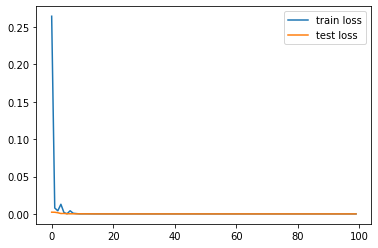

In [90]:
##### Train and test plot of the Neural Network model #####

plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

In [93]:
pred_ = pd.DataFrame((predicted * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(7)

,actual,predicted
3972,24890.0,31717.730415
415,36790.0,39919.427570
4048,13490.0,15716.367966
358,9990.0,9165.068581
1907,7890.0,7366.835300
1574,28880.0,28632.790007
2907,4999.0,5242.984953


In [94]:
##### Use KFold Cross Validation to evalaute the model and prevent the overfitting #####

KFold_ = KFold(n_splits = 5, shuffle = True, random_state = 42)
MSE_, MAE_, r2_score_, history_list_, count_ = [], [], [], [], 1

for train_index_, test_index_ in KFold_.split(X, y):

  print(f'# of Cross validation {count_} is running.\n')

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### Fit the model with that feed forward neural network #####

  history_   = model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 256, validation_data = (X_test, y_test), verbose = 1)
  predicted_ = model.predict(X_test)

  ##### Appending MSE, MAE, and R2_Score #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  r2_score_.append(r2_score(predicted_, y_test))
  history_list_.append(history_)

  count_ = count_ + 1

print('The KFold is just completed.\n')

# of Cross validation 1 is running.

Epoch 1/100
146/146 [==============================] - 0s 3ms/step - loss: 1.9124e-05 - val_loss: 1.3792e-05
Epoch 2/100
146/146 [==============================] - 0s 3ms/step - loss: 1.6231e-05 - val_loss: 1.4418e-05
Epoch 3/100
146/146 [==============================] - 0s 3ms/step - loss: 1.5925e-05 - val_loss: 1.4400e-05
Epoch 4/100
146/146 [==============================] - 0s 3ms/step - loss: 1.5711e-05 - val_loss: 1.5804e-05
Epoch 5/100
146/146 [==============================] - 0s 3ms/step - loss: 1.6385e-05 - val_loss: 1.6698e-05
Epoch 6/100
146/146 [==============================] - 0s 3ms/step - loss: 1.8331e-05 - val_loss: 1.6370e-05
Epoch 7/100
146/146 [==============================] - 0s 3ms/step - loss: 1.6347e-05 - val_loss: 1.7174e-05
Epoch 8/100
146/146 [==============================] - 0s 3ms/step - loss: 1.6407e-05 - val_loss: 1.5624e-05
Epoch 9/100
146/146 [==============================] - 0s 3ms/step - loss: 1.5966e-05 - val

In [95]:
##### Evaluate the performance #####
print('Mean Squared Error in KFold Regressor is   = ',np.array(MSE_).mean(),'\n')
print('Mean Absolute Error in KFold Regressor is  = ', np.array(MAE_).mean(),'\n')
print('R2 Score of KFold Regressor is = ', np.array(r2_score_).mean(),'\n\n')

Mean Squared Error in KFold Regressor is   =  1.9143862302347693e-05 

Mean Absolute Error in KFold Regressor is  =  0.0023872547853979213 

R2 Score of KFold Regressor is =  0.9183735009695843 





KFold 1 history is given below.




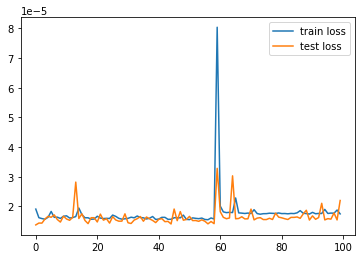


KFold 2 history is given below.




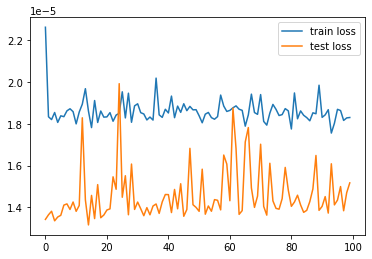


KFold 3 history is given below.




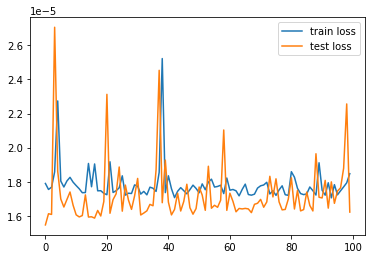


KFold 4 history is given below.




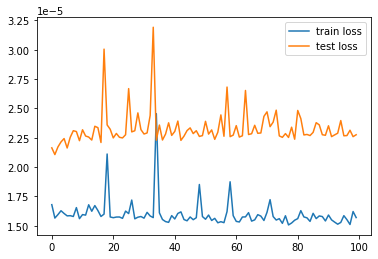


KFold 5 history is given below.




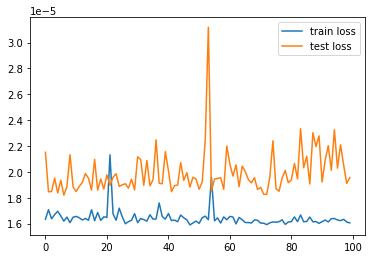

In [96]:
for index_, history_ in enumerate(history_list_):
  print(f'\nKFold {index_ + 1} history is given below.\n\n')
  plt.plot(history_.history['loss'], label = 'train loss')
  plt.plot(history_.history['val_loss'], label = 'test loss')
  plt.legend()
  plt.show()

Use Feature Selection Technique to train and evaluate the model performance.

In [99]:
###### Use mutual info regression to find out the model ######

RF_ = RandomForestRegressor()
RF_.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
##### Find out, the feature importance #####
pd.DataFrame(RF_.feature_importances_).set_index(new_df.columns).rename(columns = {0: 'importance'})

,importance
mileage,0.121355
fuel,0.005471
hp,0.100190
cars_with_model,0.765395
gear_Manual,0.004003
gear_Semi-automatic,0.000008
gear_missing,0.000054
offerType_Employee's car,0.000502
offerType_New,0.000052
offerType_Pre-registered,0.000332


In [118]:
##### Find out, the top 5 best features to train the model #####
pd.DataFrame(RF_.feature_importances_).set_index(new_df.columns).rename(columns = {0: 'importance'}).loc[:, 'importance'].nlargest(5)

cars_with_model    0.765395
mileage            0.121355
hp                 0.100190
fuel               0.005471
gear_Manual        0.004003
Name: importance, dtype: float64

In [120]:
##### Import that important feature from that importance #####

impt_feature_df = new_df[pd.DataFrame(RF_.feature_importances_).set_index(new_df.columns).rename(columns = {0: 'importance'}).loc[:, 'importance'].nlargest(5).index]
impt_feature_df.head()

,cars_with_model,mileage,hp,fuel,gear_Manual
0,11731.979592,235000,116.0,6,1
1,13540.550268,92800,122.0,5,1
2,5678.800000,149300,160.0,5,1
3,11191.766067,96200,110.0,5,1
4,8477.145251,156000,156.0,5,1


In [122]:
##### Scaling the dataset #####
standard_scaler_ = StandardScaler()
X_impt = standard_scaler_.fit_transform(impt_feature_df)

print(X_impt)

[[-0.27800103  2.61593763 -0.22527027  0.78655865  0.72628175]
 [-0.17412761  0.34526567 -0.14572094 -0.57007596  0.72628175]
 [-0.62565925  1.24746655  0.35809152 -0.57007596  0.72628175]
 ...
 [-0.31876358 -1.13499848 -0.82189029  3.49982788  0.72628175]
 [-0.31876358 -1.13499848 -0.82189029  3.49982788  0.72628175]
 [-0.31876358 -1.13499848 -0.82189029  3.49982788  0.72628175]]


In [123]:
##### Split the data into Train and test #####

X_train, X_test, y_train, y_test = train_test_split(X_impt, y, test_size = 0.30, random_state = 42, shuffle = True)

print(f'X_train shape is = {X_train.shape}\n')
print(f'X_test shape is  = {X_test.shape}\n')
print(f'y_train shape is = {y_train.shape}\n')
print(f'y_test shape is  = {y_test.shape}\n')

X_train shape is = (32483, 5)

X_test shape is  = (13922, 5)

y_train shape is = (32483,)

y_test shape is  = (13922,)



In [124]:
##### Use Decision Tree Regressor to evaluate the model #####
DecisionTreeRegressor_ = RandomForestRegressor(n_estimators = 500)
DecisionTreeRegressor_.fit(X_train, y_train)

predicted_ = DecisionTreeRegressor_.predict(X_test)

print('Mean Squared Error in Rf Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in RF Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of RF Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(5)

Mean Squared Error in Rf Regressor is   =  1.3156959931798657e-05 

Mean Absolute Error in RF Regressor is  =  0.0018117532790685488 

R2 Score of RF Regressor is =  0.944618914730718 




,actual,predicted
1358,12699.0,8352.830
5530,10900.0,12702.102
849,5990.0,6093.934
1727,15750.0,14824.940
2709,24900.0,29346.794


In [125]:
##### Use KFold Cross Validation to evalaute the model and prevent the overfitting #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
MSE_, MAE_, r2_score_, count_ = [], [], [], 1

for train_index_, test_index_ in KFold_.split(X, y):

  print(f'# of Cross validation {count_} is running.\n')

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  DecisionTreeRegressor_ = RandomForestRegressor()
  DecisionTreeRegressor_.fit(X_train, y_train)

  predicted_ = DecisionTreeRegressor_.predict(X_test)

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  r2_score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

# of Cross validation 1 is running.

# of Cross validation 2 is running.

# of Cross validation 3 is running.

# of Cross validation 4 is running.

# of Cross validation 5 is running.

# of Cross validation 6 is running.

# of Cross validation 7 is running.

# of Cross validation 8 is running.

# of Cross validation 9 is running.

# of Cross validation 10 is running.



In [126]:
##### Evaluate the performance #####
print('Mean Squared Error in KFold Regressor is   = ',np.array(MSE_).mean(),'\n')
print('Mean Absolute Error in KFold Regressor is  = ', np.array(MAE_).mean(),'\n')
print('R2 Score of KFold Regressor is = ', np.array(r2_score_).mean(),'\n\n')

Mean Squared Error in KFold Regressor is   =  1.8345825220498477e-05 

Mean Absolute Error in KFold Regressor is  =  0.0017717095110433034 

R2 Score of KFold Regressor is =  0.9220414957716369 




In [127]:
##### Create a sequential model #####

model = Sequential()

##### Create first hidden layer with 256 neurons with L2 regularization #####

model.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X.shape[1]))

##### Create second hidden layer with 128 neurons with L2 regularization #####

model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

##### Create last hidden layer with 64 neurons with L2 regularization #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))

##### Create an output layer with activation linear #####

model.add(Dense(units = 1, activation = 'linear'))

##### Compile the model #####

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

##### show the summary of the model #####

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               3072      
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 44,289
Trainable params: 44,289
Non-trainable params: 0
_________________________________________________________________


In [128]:
history_ = model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 64, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
653/653 [==============================] - 3s 3ms/step - loss: 0.1156 - val_loss: 0.0045
Epoch 2/100
653/653 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 4.0546e-04
Epoch 3/100
653/653 [==============================] - 2s 2ms/step - loss: 5.4886e-04 - val_loss: 7.7316e-04
Epoch 4/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
653/653 [==============================] - 2s 2ms/step - loss: 0.0296 - val_loss: 0.0075
Epoch 6/100
653/653 [==============================] - 2s 3ms/step - loss: 0.0073 - val_loss: 2.1066e-04
Epoch 7/100
653/653 [==============================] - 2s 2ms/step - loss: 8.0159e-05 - val_loss: 1.3291e-04
Epoch 8/100
653/653 [==============================] - 2s 2ms/step - loss: 8.2124e-05 - val_loss: 7.8375e-05
Epoch 9/100
653/653 [==============================] - 2s 3ms/step - loss: 4.1738e-04 - val_loss: 1.4769e-04
Epoch 10/100
653/653 [=============================

In [129]:
##### Evaluate the model performance #####

predicted_ = model.predict(X_test)
print('Mean Squared Error in Rf Regressor is   = ', mean_squared_error(predicted_, y_test),'\n')
print('Mean Absolute Error in RF Regressor is  = ', mean_absolute_error(predicted_, y_test),'\n')
print('R2 Score of RF Regressor is = ', r2_score(predicted_, y_test),'\n\n')

pred_ = pd.DataFrame((predicted_ * 1199900), columns = ['predicted'])
actual_ = pd.DataFrame((y_test.values * 1199900), columns = ['actual'])

pd.concat([actual_, pred_], axis = 1).sample(10)

145/145 [==============================] - 0s 1ms/step
Mean Squared Error in Rf Regressor is   =  1.9818691281739827e-05 

Mean Absolute Error in RF Regressor is  =  0.0021524148063863336 

R2 Score of RF Regressor is =  0.9533809803210288 




,actual,predicted
3665,8199.0,9214.281897
2068,21995.0,13555.244167
4091,20840.0,11457.618609
1563,41977.0,36815.029357
3357,8280.0,6158.141543
4579,14990.0,15263.324740
891,5999.0,3833.586488
2506,6490.0,5559.633012
4191,25990.0,20784.786394
915,6790.0,6150.205101


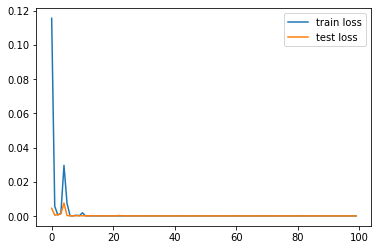

In [130]:
##### Train and test plot of the Neural Network model #####

plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

In [131]:
##### Comments after analysis #####

print('It is surprised to see that, after doing feature selection, the r2 score and other metrics for evaluating model is increased.')

It is surprised to see that, after doing feature selection, the r2 score and other metrics for evaluating model is increased.


In [132]:
##### Use KFold Cross Validation to evalaute the model and prevent the overfitting #####

KFold_ = KFold(n_splits = 5, shuffle = True, random_state = 42)
MSE_, MAE_, r2_score_, history_list_, count_ = [], [], [], [], 1

for train_index_, test_index_ in KFold_.split(X, y):

  print(f'# of Cross validation {count_} is running.\n')

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### Fit the model with that feed forward neural network #####

  history_   = model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 64, validation_data = (X_test, y_test), verbose = 1)
  predicted_ = model.predict(X_test)

  ##### Appending MSE, MAE, and R2_Score #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  r2_score_.append(r2_score(predicted_, y_test))
  history_list_.append(history_)

  count_ = count_ + 1

print('The KFold is just completed.\n')

# of Cross validation 1 is running.

Epoch 1/100
581/581 [==============================] - 2s 3ms/step - loss: 1.9343e-05 - val_loss: 1.6675e-05
Epoch 2/100
581/581 [==============================] - 2s 3ms/step - loss: 2.0455e-05 - val_loss: 1.5132e-05
Epoch 3/100
581/581 [==============================] - 2s 3ms/step - loss: 1.9219e-05 - val_loss: 1.8538e-05
Epoch 4/100
581/581 [==============================] - 2s 3ms/step - loss: 1.9303e-05 - val_loss: 1.5220e-05
Epoch 5/100
581/581 [==============================] - 2s 3ms/step - loss: 1.9732e-05 - val_loss: 2.0572e-05
Epoch 6/100
581/581 [==============================] - 2s 3ms/step - loss: 1.9747e-05 - val_loss: 1.7357e-05
Epoch 7/100
581/581 [==============================] - 2s 3ms/step - loss: 2.2102e-05 - val_loss: 1.6616e-05
Epoch 8/100
581/581 [==============================] - 2s 3ms/step - loss: 1.8944e-05 - val_loss: 1.9715e-05
Epoch 9/100
581/581 [==============================] - 2s 3ms/step - loss: 1.9274e-05 - val

In [133]:
##### Evaluate the performance #####
print('Mean Squared Error in KFold Regressor is   = ',np.array(MSE_).mean(),'\n')
print('Mean Absolute Error in KFold Regressor is  = ', np.array(MAE_).mean(),'\n')
print('R2 Score of KFold Regressor is = ', np.array(r2_score_).mean(),'\n\n')

Mean Squared Error in KFold Regressor is   =  1.901538430882274e-05 

Mean Absolute Error in KFold Regressor is  =  0.0022233903236849577 

R2 Score of KFold Regressor is =  0.916782889662026 





KFold 1 history is given below.




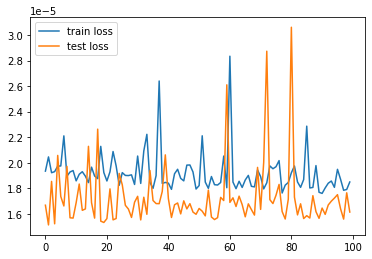


KFold 2 history is given below.




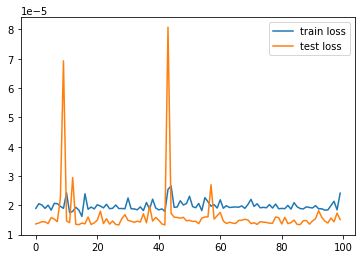


KFold 3 history is given below.




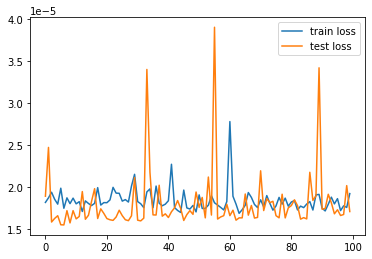


KFold 4 history is given below.




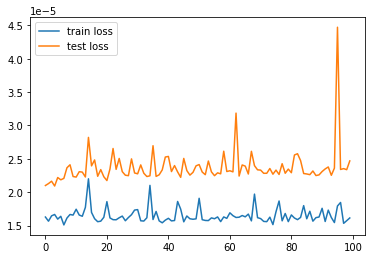


KFold 5 history is given below.




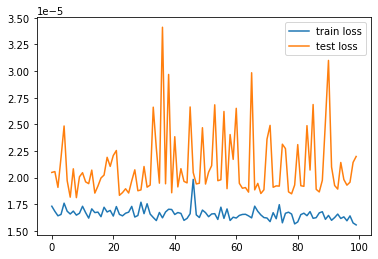

In [134]:
##### Plot the train and test history for each Kfold #####
for index_, history_ in enumerate(history_list_):
  print(f'\nKFold {index_ + 1} history is given below.\n\n')
  plt.plot(history_.history['loss'], label = 'train loss')
  plt.plot(history_.history['val_loss'], label = 'test loss')
  plt.legend()
  plt.show()